In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp
from PIL import Image
from scipy.optimize import curve_fit

def px_remove(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x+1]+temp[y,x-1])/4
    return temp

def px_remove_edge(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x-1])/3
    return temp

plt.rcParams.update({'font.size':12})
plt.rcParams['font.sans-serif'] = "Helvetica"
%matplotlib notebook

In [2]:
def linear(x,m,c):
    return m*x+c

# Load Pulse Height Data

In [3]:
pulse1 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_1b.txt',delimiter='\t')
pulse2 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_2b.txt',delimiter='\t')
pulse3 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_3b.txt',delimiter='\t')
pulse4 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_4b.txt',delimiter='\t')
pulse5 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_5b.txt',delimiter='\t')
pulse6 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_6b.txt',delimiter='\t')
pulse7 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_7b.txt',delimiter='\t')
pulse8 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_8b.txt',delimiter='\t')
pulse9 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_9b.txt',delimiter='\t')
pulse10 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_10b.txt',delimiter='\t')
pulse11 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_11b.txt',delimiter='\t')
pulse12 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_12b.txt',delimiter='\t')
pulse13 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_13b.txt',delimiter='\t')
pulse14 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_14b.txt',delimiter='\t')
pulse15 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_15b.txt',delimiter='\t')
pulse16 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_16b.txt',delimiter='\t')
pulse17 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_17b.txt',delimiter='\t')
pulse18 = np.loadtxt('Pulse_Temp_Data/Pulse_Analysis/pulses_18b.txt',delimiter='\t')

pulses_all = [pulse2,pulse3,pulse4,pulse5,pulse6,pulse7,pulse8,pulse9,pulse10,pulse11,pulse12,pulse13,pulse14,pulse15,pulse16,pulse17,pulse18]


In [4]:
### Calculate Resistances
Rs_all = []
Rs_avg = []
Rs_err = []
Vi_avg = []
Vi_err = []
Vr_avg = []
Vr_err = []
Vt_avg = []
Vt_err = []
for i in np.arange(0,len(pulses_all),1):
    res=50*(pulses_all[i][:,0]+pulses_all[i][:,1]-pulses_all[i][:,2])/(pulses_all[i][:,2])
    Rs_all.append(res)
    Rs_avg.append(np.average(res))
    Rs_err.append(np.std(res))
    Vi_avg.append(np.average(pulses_all[i][:,0]))
    Vi_err.append(np.std(pulses_all[i][:,0]))
    Vr_avg.append(np.average(pulses_all[i][:,1]))
    Vr_err.append(np.std(pulses_all[i][:,1]))
    Vt_avg.append(np.average(pulses_all[i][:,2]))
    Vt_err.append(np.std(pulses_all[i][:,2]))
    

print(Vi_avg[14])
print(Vi_err[14])
print(Rs_avg[14])
print(Rs_err[14])

start = 0.0
stop = 1.0
number_of_lines = 20
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ plt.cm.plasma(x) for x in cm_subsection ]

0.7624131935483873
0.001616006955018475
100.38690372781919
0.6952838221266365


<IPython.core.display.Javascript object>


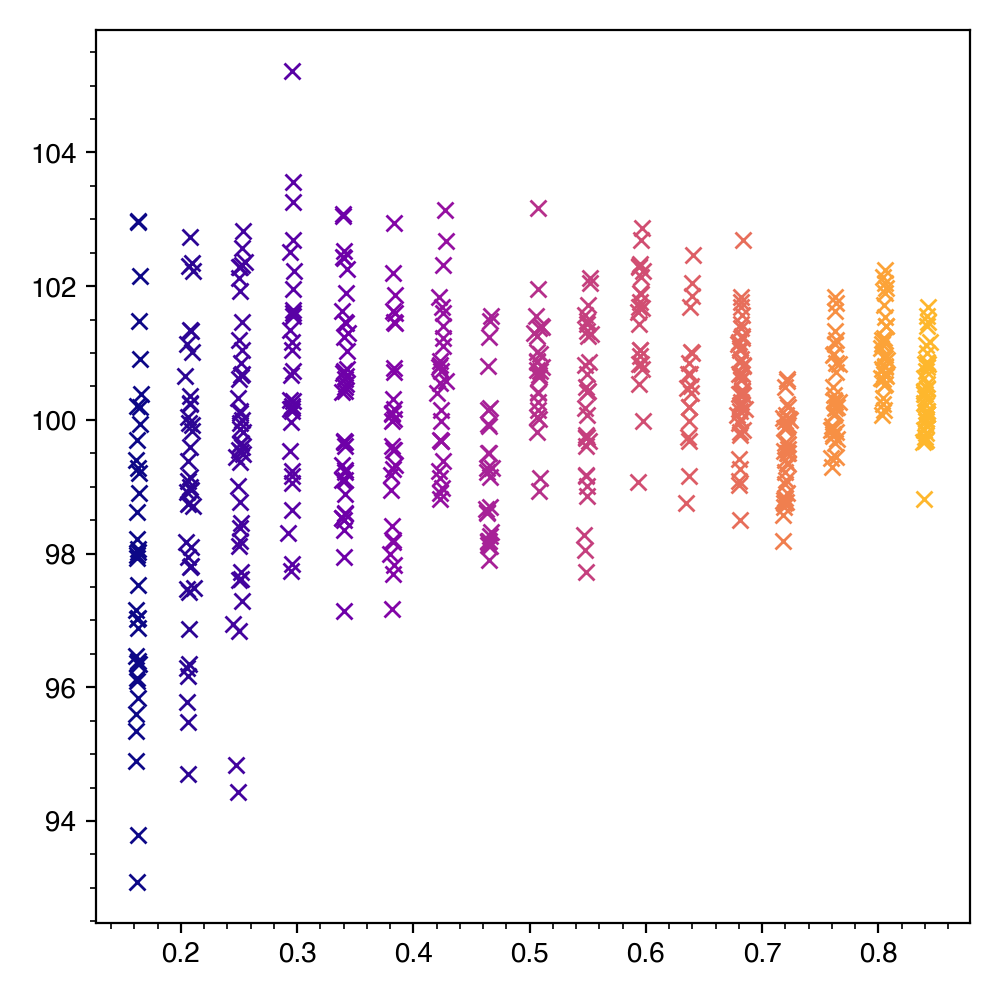

In [5]:
plt.figure(figsize=(5,5))
ax1=plt.subplot2grid((1,1),(0,0), rowspan=1,colspan=1)
for i in np.arange(0,len(pulses_all),1):
    plt.plot(pulses_all[i][:,0],Rs_all[i],marker='x',color=colors[i],ls='')
ax1.minorticks_on()    
plt.tight_layout()

In [6]:
### Converting R into T
grad = 0.106
intc = 79.42
# ohms per K
dT_avg = (np.array(Rs_avg))/grad
dT_err = (np.array(Rs_err))/grad

### Volts into Current Density
area = 700*10**(-9)*200*10**(-9)
avg_R = np.average(Rs_avg)
print(avg_R)

Jc_avg = np.array(Vt_avg)/50/np.array(area)

print(Jc_avg)
print(Vt_avg)

100.14498901602556
[1.12216873e+10 1.41858955e+10 1.72604221e+10 2.02700524e+10
 2.35328107e+10 2.65265665e+10 2.93413862e+10 3.25300330e+10
 3.52377088e+10 3.82967048e+10 4.11393478e+10 4.43559023e+10
 4.74475850e+10 5.06351469e+10 5.33044470e+10 5.60172589e+10
 5.87797707e+10]
[0.07855181081081082, 0.09930126829268293, 0.12082295454545454, 0.14189036666666668, 0.16472967499999996, 0.18568596551724137, 0.2053897037037037, 0.22771023076923075, 0.24666396153846154, 0.2680769333333333, 0.2879754347826087, 0.3104913157894737, 0.3321330952380952, 0.3544460285714286, 0.37313112903225815, 0.39212081249999997, 0.41145839473684215]


In [7]:
### Fitting Slope to dT
Vi_fit=np.array([0,1])
pm,array = curve_fit(linear, Vi_avg, dT_avg, sigma = dT_err/10, p0=(0,0), maxfev=10000)
dT_fit=linear(Vi_fit,pm[0],pm[1])

pme = np.sqrt(np.diag(array))

print('m =', pm[0], ', error = ', pme[0])
print('c =', pm[1], ', error = ', pme[1])

m = 10.282901386293753 , error =  8.661998297426452
c = 940.3054747897786 , error =  5.849508069583467


In [8]:
### Fitting Slope to dT
Vi_fit=np.array([0,1])
pm2,array2 = curve_fit(linear, Vi_avg, dT_avg, p0=(0,0), maxfev=10000)
dT_fit2=linear(Vi_fit,pm2[0],pm2[1])

pme2 = np.sqrt(np.diag(array2))

Jc_fit = np.array(Vi_fit)/avg_R/np.array(area)

print('m2 =', pm2[0], ', error2 = ', pme2[0])
print('c2 =', pm2[1], ', error2 = ', pme2[1])

m2 = 20.418186174564198 , error2 =  7.7831193532623235
c2 = 934.4000527716581 , error2 =  4.270683182546441


<IPython.core.display.Javascript object>


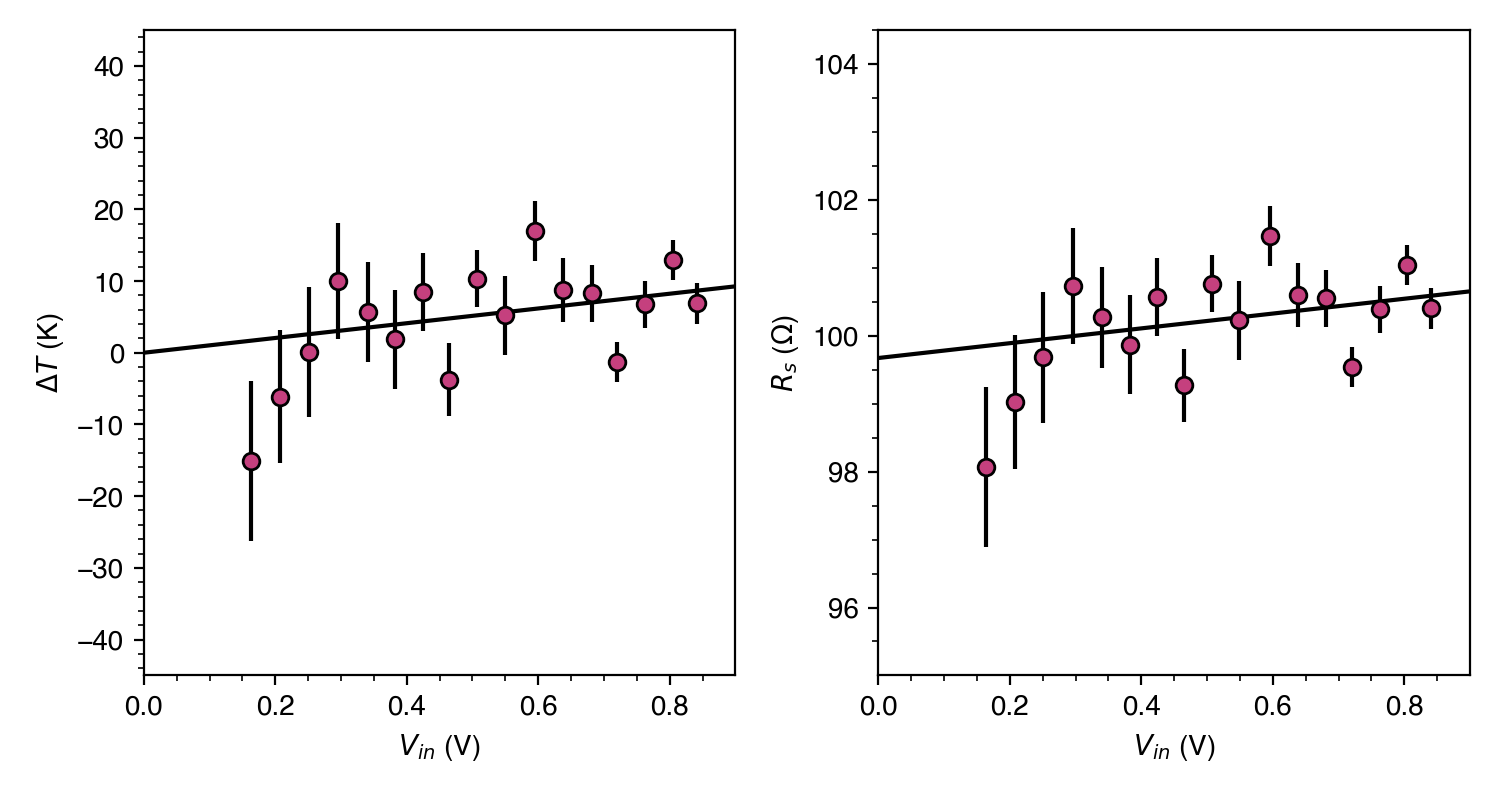

In [9]:
plt.figure(figsize=(7.5,4))
ax1=plt.subplot2grid((1,2),(0,0), rowspan=1,colspan=1)
plt.errorbar(Vi_avg,dT_avg-dT_fit[0],yerr=dT_err/2,ls='',color='k')
plt.plot(Vi_fit,dT_fit-dT_fit[0],color='k',marker='')
plt.plot(Vi_avg,dT_avg-dT_fit[0],marker='o',color=colors[9],ls='',markeredgecolor='k')

plt.ylim(-45,45)
plt.xlim(0,0.9)
ax1.minorticks_on()
plt.ylabel('$\Delta T$ (K)')
plt.xlabel('$V_{in}$ (V)') 


ax1=plt.subplot2grid((1,2),(0,1), rowspan=1,colspan=1)
plt.errorbar(Vi_avg,dT_avg*grad,yerr=dT_err/2*grad,ls='',color='k')
plt.plot(Vi_fit,dT_fit*grad,color='k',marker='')
plt.plot(Vi_avg,dT_avg*grad,marker='o',color=colors[9],ls='',markeredgecolor='k')
plt.ylim(95,104.5)
plt.xlim(0,0.9)
ax1.minorticks_on()
plt.ylabel('$R_{s}$ ($\Omega$)')
plt.xlabel('$V_{in}$ (V)') 

plt.tight_layout()

In [10]:
# Pulse 3
data_c1 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C1--Trace--00520.txt',delimiter=',',skiprows=0,dtype=float)
ts_c1 = data_c1[:,0]*10**9
As_c1 = data_c1[:,1]

data_c2 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C4--Trace--00520.txt',delimiter=',',skiprows=0,dtype=float)
ts_c2 = data_c2[:,0]*10**9
As_c2 = data_c2[:,1]

<IPython.core.display.Javascript object>


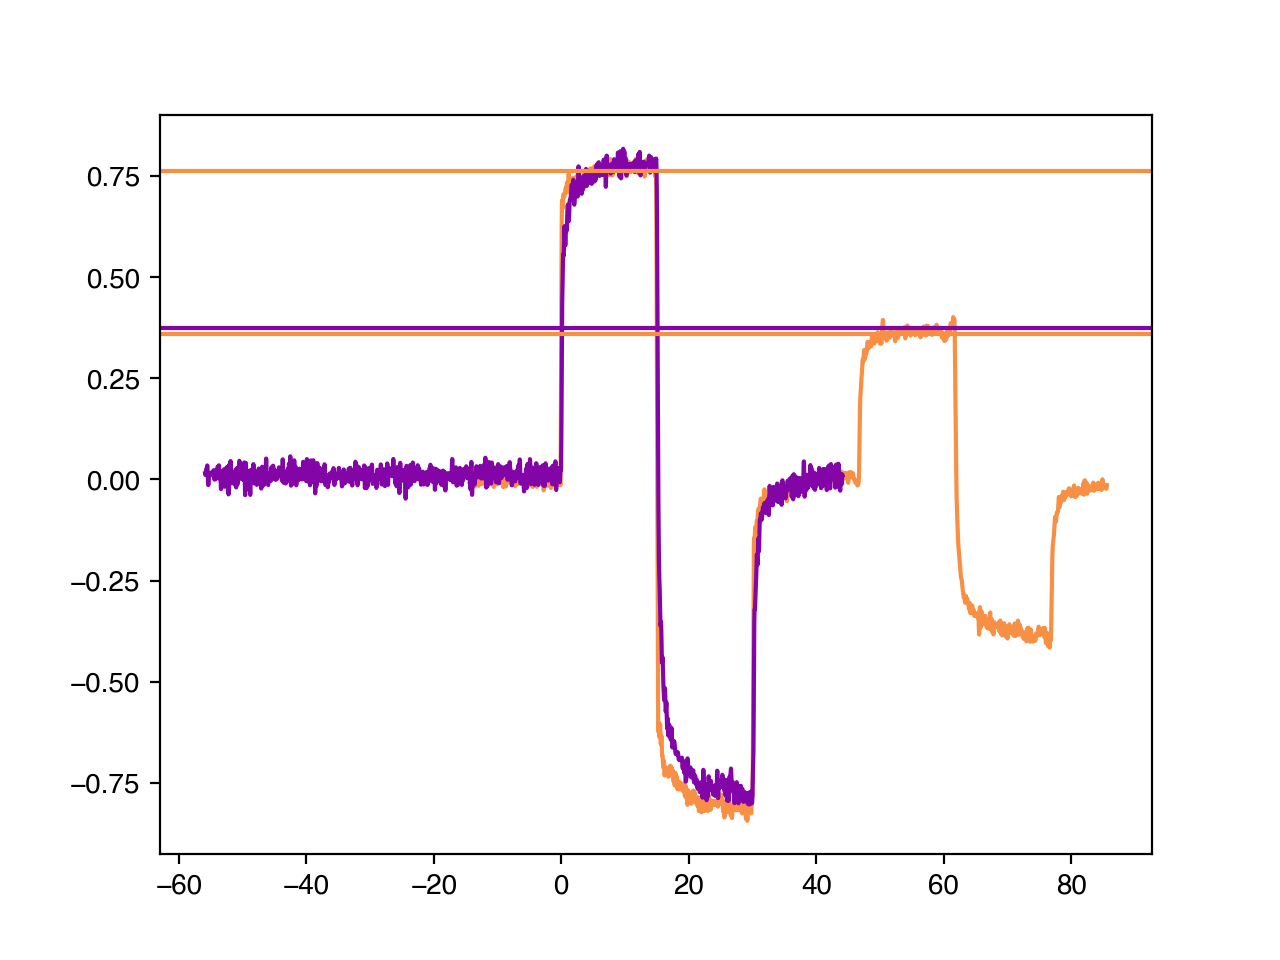

In [11]:
plt.figure()
plt.plot(ts_c1,As_c1,color=colors[14])
plt.plot(ts_c2-41.5,As_c2*2.05,color=colors[5])
plt.axhline(y=Vi_avg[14],color=colors[14])
plt.axhline(y=Vr_avg[14],color=colors[14])
plt.axhline(y=Vt_avg[14],color=colors[5])

# Load Data

In [12]:
data = np.loadtxt('Pulse_Temp_Data/TvR_Callibration.csv',delimiter=',')
Ts = data[:,0][15:]+273
Rs = data[:,1][15:]

T_fit=np.array([290,390])

pm,ar = curve_fit(linear, Ts, Rs, p0=(0,0), maxfev=10000)
fit=linear(T_fit,pm[0],pm[1])
print('m =', pm[0])
print('c =', pm[1])

m = 0.10645139482963506
c = 79.42766437586307


In [13]:
start = 0.0
stop = 1.0
number_of_lines = 10
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ plt.cm.plasma(x) for x in cm_subsection ]

col1 = colors[8]
col1p5=colors[7]
col2 = colors[6]
col3 = colors[4]
col4 = colors[2]

<IPython.core.display.Javascript object>


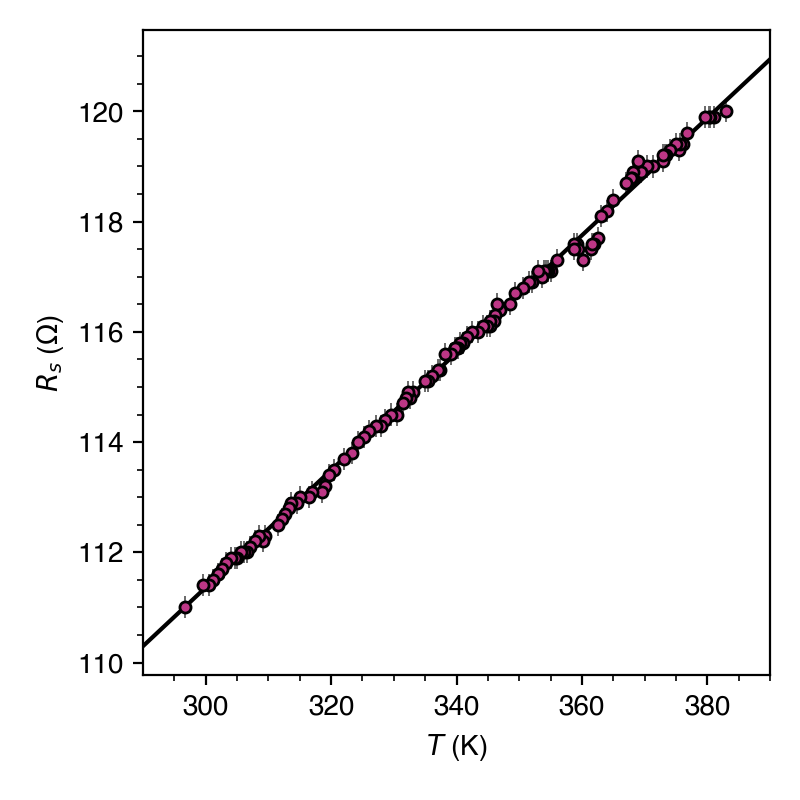

In [14]:
plt.figure(figsize=(4,4))

ax1=plt.subplot2grid((1,1),(0,0), rowspan=1,colspan=1)
plt.errorbar(Ts,Rs,yerr=0.2,color='dimgrey',zorder=1,lw=0.7,ls='')
plt.plot(T_fit,fit,color='k')
plt.plot(Ts,Rs,marker='o',ls='',markeredgecolor='k',color=col3,markersize=4,alpha=1)

plt.xlim(290,390)
plt.ylabel('$R_s$ ($\Omega$)')
plt.xlabel('$T$ (K)')

ax1.minorticks_on()

plt.tight_layout()

# Load Pulse Traces

In [15]:
# Pulse 1
data_a1 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C1--Trace--00160.txt',delimiter=',',skiprows=0,dtype=float)
ts_a1 = data_a1[:,0]*10**9
As_a1 = data_a1[:,1]

data_a2 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C4--Trace--00160.txt',delimiter=',',skiprows=0,dtype=float)
ts_a2 = data_a2[:,0]*10**9
As_a2 = data_a2[:,1]

# Pulse 2
data_b1 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C1--Trace--00320.txt',delimiter=',',skiprows=0,dtype=float)
ts_b1 = data_b1[:,0]*10**9
As_b1 = data_b1[:,1]

data_b2 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C4--Trace--00320.txt',delimiter=',',skiprows=0,dtype=float)
ts_b2 = data_b2[:,0]*10**9
As_b2 = data_b2[:,1]

# Pulse 3
data_c1 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C1--Trace--00520.txt',delimiter=',',skiprows=0,dtype=float)
ts_c1 = data_c1[:,0]*10**9
As_c1 = data_c1[:,1]

data_c2 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C4--Trace--00520.txt',delimiter=',',skiprows=0,dtype=float)
ts_c2 = data_c2[:,0]*10**9
As_c2 = data_c2[:,1]

# Pulse 3
data_d1 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C1--Trace--00580.txt',delimiter=',',skiprows=0,dtype=float)
ts_d1 = data_d1[:,0]*10**9
As_d1 = data_d1[:,1]

data_d2 = np.loadtxt('Pulse_Temp_Data/Pulse_Traces/C4--Trace--00580.txt',delimiter=',',skiprows=0,dtype=float)
ts_d2 = data_d2[:,0]*10**9
As_d2 = data_d2[:,1]


<IPython.core.display.Javascript object>


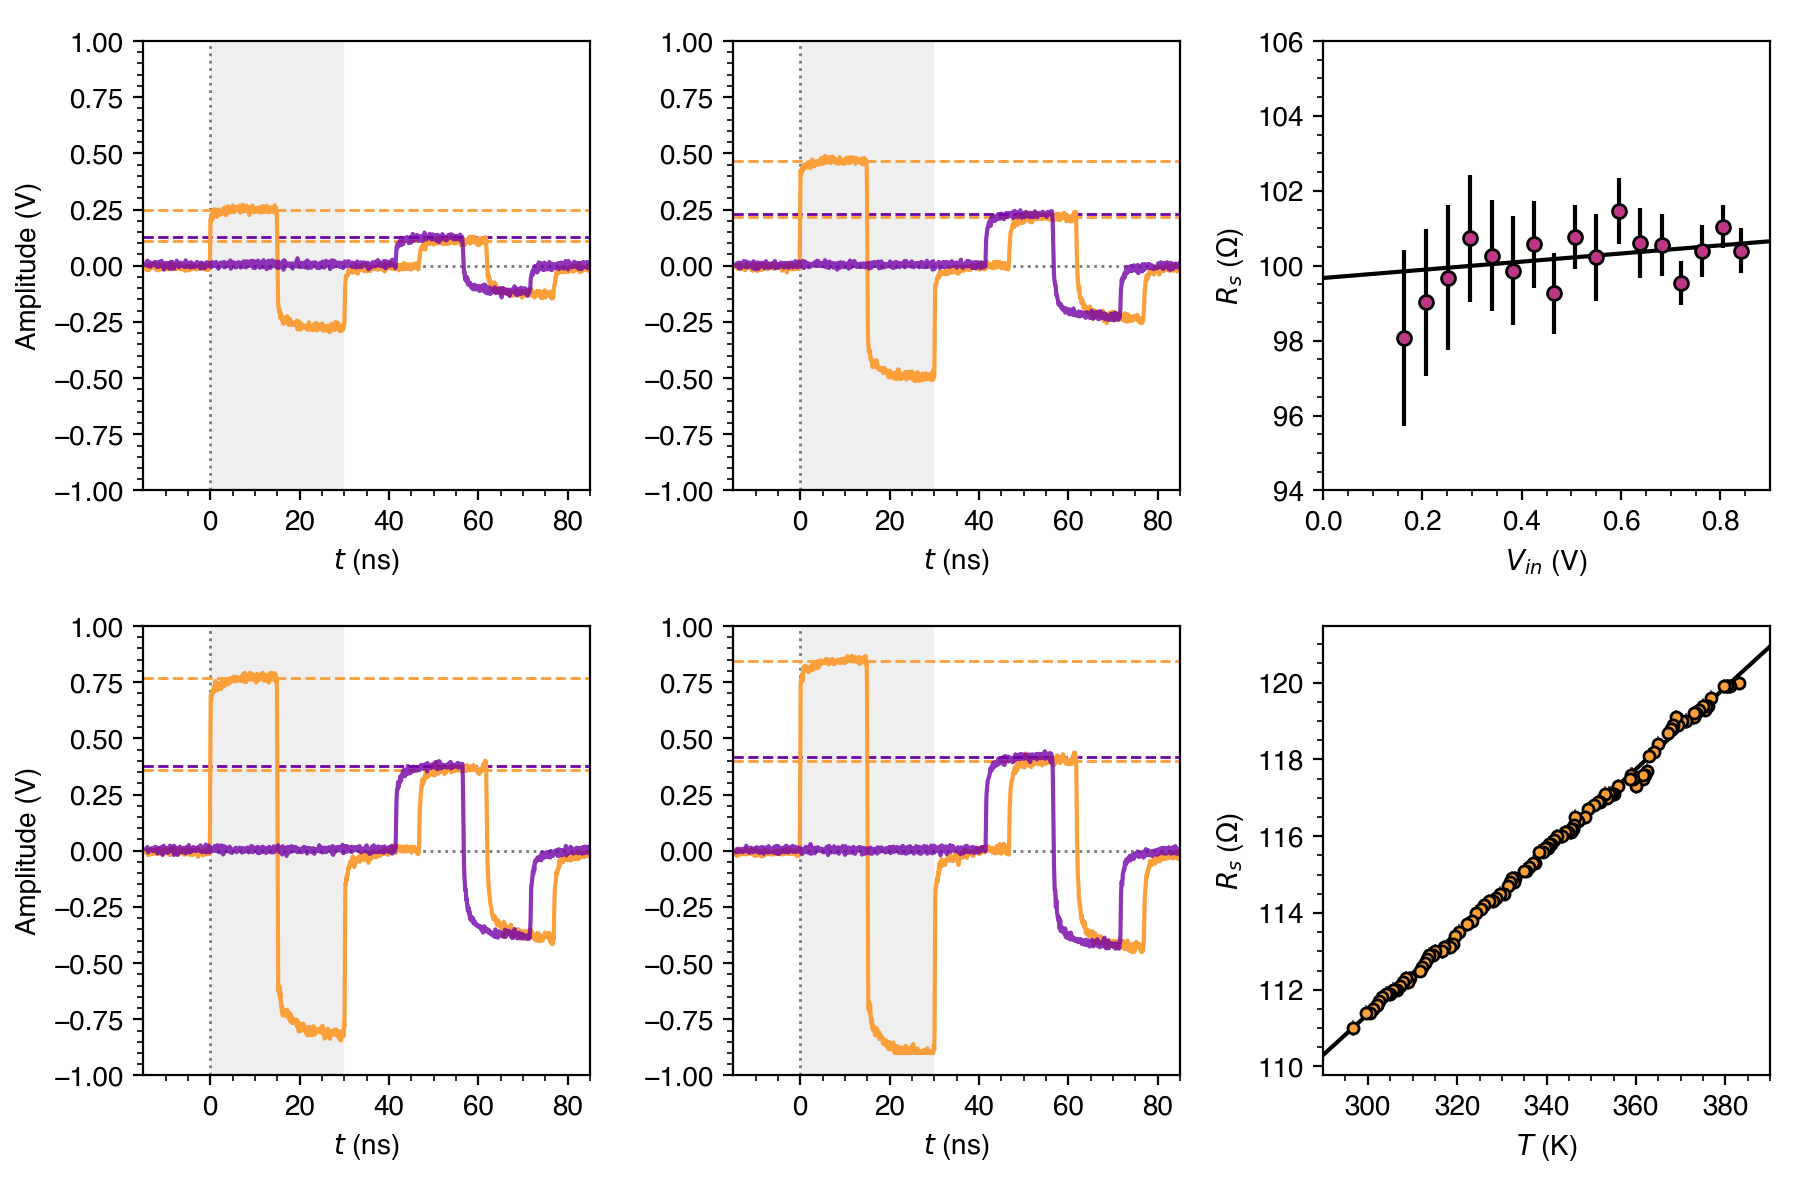

In [16]:
plt.figure(figsize=(9,6))

###############
ax1=plt.subplot2grid((2,3),(0,0), rowspan=1,colspan=1)

plt.axvline(x=0,color='dimgrey',lw=1,ls=':',alpha=0.9)
plt.axhline(y=0,color='dimgrey',lw=1,ls=':',alpha=0.9)
plt.axvline(x=15,color='dimgrey',lw=48,ls='-',alpha=0.1)

plt.axhline(y=0.25,color=col1p5,lw=1,ls="--")
plt.axhline(y=0.108,color=col1p5,lw=1,ls="--")
plt.axhline(y=0.126,color=col4,lw=1,ls="--")

plt.plot(ts_a1,As_a1,color=col1p5,lw=1.5)
plt.plot(ts_a2,As_a2,color=col4,lw=1.5,alpha=0.8)
plt.ylim(-1.0,1.0)
plt.xlim(-15,85)
ax1.minorticks_on()
plt.ylabel('Amplitude (V)')
plt.xlabel('$t$ (ns)')

###############
ax1=plt.subplot2grid((2,3),(0,1), rowspan=1,colspan=1)

plt.axvline(x=0,color='dimgrey',lw=1,ls=':',alpha=0.9)
plt.axhline(y=0,color='dimgrey',lw=1,ls=':',alpha=0.9)
plt.axvline(x=15,color='dimgrey',lw=48,ls='-',alpha=0.1)

plt.axhline(y=0.467,color=col1p5,lw=1,ls="--")
plt.axhline(y=0.215,color=col1p5,lw=1,ls="--")
plt.axhline(y=0.229,color=col4,lw=1,ls="--")

plt.plot(ts_b1,As_b1,color=col1p5,lw=1.5)
plt.plot(ts_b2,As_b2,color=col4,lw=1.5,alpha=0.8)
plt.ylim(-1.0,1.0)
plt.xlim(-15,85)
ax1.minorticks_on()
#plt.ylabel('Amplitude (V)')
plt.xlabel('$t$ (ns)')

###############
ax1=plt.subplot2grid((2,3),(1,0), rowspan=1,colspan=1)

plt.axvline(x=0,color='dimgrey',lw=1,ls=':',alpha=0.9)
plt.axhline(y=0,color='dimgrey',lw=1,ls=':',alpha=0.9)
plt.axvline(x=15,color='dimgrey',lw=48,ls='-',alpha=0.1)

plt.axhline(y=0.768,color=col1p5,lw=1,ls="--")
plt.axhline(y=0.358,color=col1p5,lw=1,ls="--")
plt.axhline(y=0.376,color=col4,lw=1,ls="--")

plt.plot(ts_c1,As_c1,color=col1p5,lw=1.5)
plt.plot(ts_c2,As_c2,color=col4,lw=1.5,alpha=0.8)
plt.ylim(-1.0,1.0)
plt.xlim(-15,85)
ax1.minorticks_on()
plt.ylabel('Amplitude (V)')
plt.xlabel('$t$ (ns)')

###############
ax1=plt.subplot2grid((2,3),(1,1), rowspan=1,colspan=1)

plt.axvline(x=0,color='dimgrey',lw=1,ls=':',alpha=0.9)
plt.axhline(y=0,color='dimgrey',lw=1,ls=':',alpha=0.9)
plt.axvline(x=15,color='dimgrey',lw=48,ls='-',alpha=0.1)

plt.axhline(y=0.845,color=col1p5,lw=1,ls="--")
plt.axhline(y=0.398,color=col1p5,lw=1,ls="--")
plt.axhline(y=0.418,color=col4,lw=1,ls="--")

plt.plot(ts_d1,As_d1,color=col1p5,lw=1.5)
plt.plot(ts_d2,As_d2,color=col4,lw=1.5,alpha=0.8)
plt.ylim(-1.0,1.0)
plt.xlim(-15,85)
ax1.minorticks_on()
#plt.ylabel('Amplitude (V)')
plt.xlabel('$t$ (ns)')

###############
ax1=plt.subplot2grid((2,3),(0,2), rowspan=1,colspan=1)
plt.errorbar(Vi_avg,dT_avg*grad,yerr=dT_err*grad,ls='',color='k')
plt.plot(Vi_fit,dT_fit*grad,color='k',marker='')
plt.plot(Vi_avg,dT_avg*grad,marker='o',color=col3,ls='',markeredgecolor='k',markersize=5)
plt.ylim(94,106)
plt.xlim(0,0.9)
ax1.minorticks_on()
plt.ylabel('$R_{s}$ ($\Omega$)')
plt.xlabel('$V_{in}$ (V)') 

###############
ax1=plt.subplot2grid((2,3),(1,2), rowspan=1,colspan=1)
plt.errorbar(Ts,Rs,yerr=0.2,color='dimgrey',zorder=1,lw=0.7,ls='')
plt.plot(T_fit,fit,color='k',lw=1.5)
plt.plot(Ts,Rs,marker='o',ls='',markeredgecolor='k',color=col1p5,markersize=4,alpha=1)

plt.xlim(290,390)
plt.ylabel('$R_s$ ($\Omega$)')
plt.xlabel('$T$ (K)')

ax1.minorticks_on()

###############
plt.tight_layout()
plt.savefig("Figure_Panels/Extended_Data_Temperature_Resistance.png",dpi=300)

# Main Figure

In [17]:
### Fills ###
top_1 = [275/15*20,275/15*20]
bot_1 = [250/15*20,250/15*20]
pul   = [-0.5,9]

top_2 = [365/15*20,365/15*20]
bot_2 = [340/15*20,340/15*20]

# BP Position Stuff #

FS_up = np.array([28,28,20,27,21,29,15,21,14,21,15,11,14,11,6,7])*15
FS_up = np.array([31,31,21,30,21,30,16,22,15,21,15,15,7,8])*15+15
FS_up_p = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,])

FS_down = np.array([18,23,18,23,13,23,13,17,13,13,22,14,13])*20
FS_down_p = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])*2

BP_data = np.array([24,17,23,23,18,25,25])*20
BP_p = np.array([1,2,3,4,5,6,7])*3

all_d = np.append(FS_up,FS_down)
all_data = np.append(all_d,BP_data)

In [18]:
start = 0.0
stop = 1.0
number_of_lines = 10
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ plt.cm.plasma(x) for x in cm_subsection ]

col1 = colors[8]
col1p5=colors[7]
col2 = colors[6]
col3 = colors[4]
col4 = colors[2]



<IPython.core.display.Javascript object>


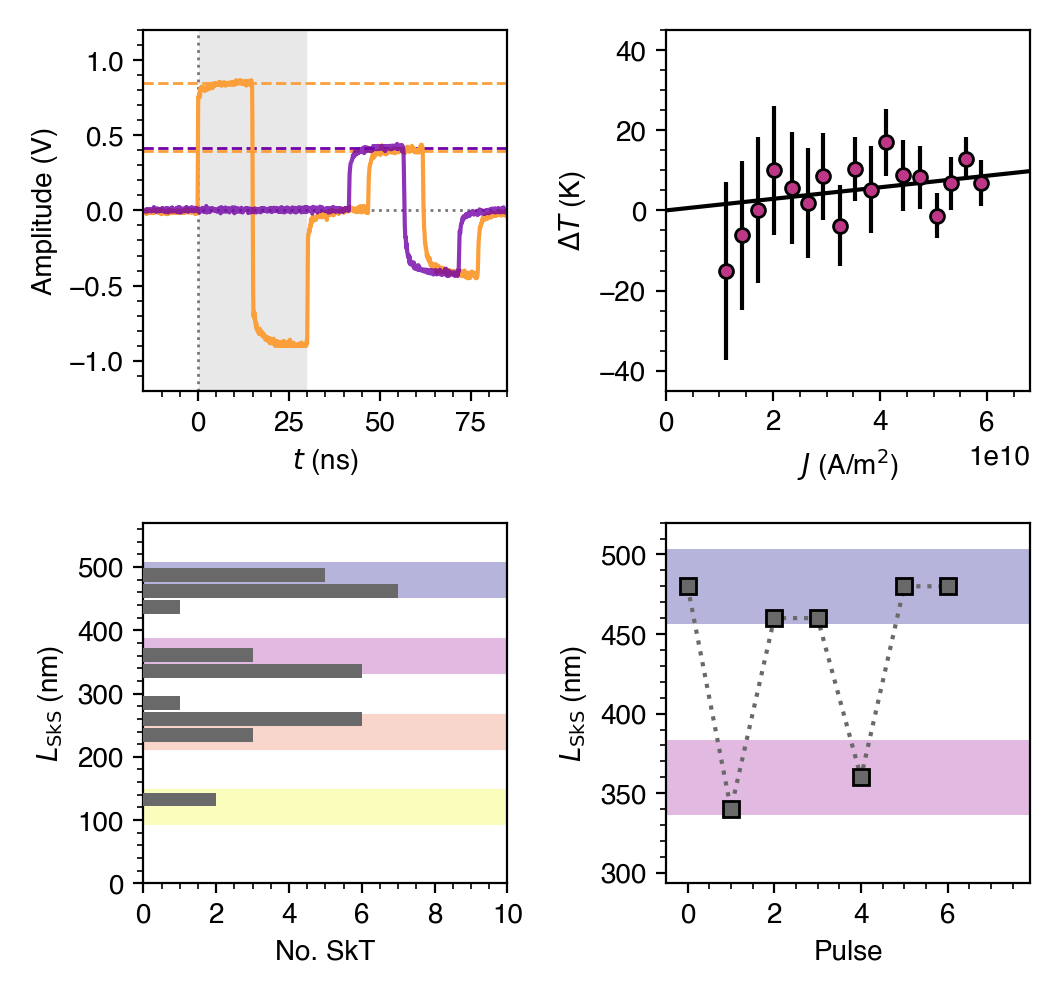

In [19]:
plt.figure(figsize=(5.3,5))


ax1=plt.subplot2grid((2,2),(0,0), rowspan=1,colspan=1)

plt.axvline(x=0,color='dimgrey',lw=1,ls=':',alpha=0.9)
plt.axvline(x=15,color='dimgrey',lw=39,ls='-',alpha=0.15)
plt.axhline(y=0,color='dimgrey',lw=1,ls=':',alpha=0.9)

plt.axhline(y=0.845,color=colors[7],lw=1,ls="--")
plt.axhline(y=0.398,color=colors[7],lw=1,ls="--")
plt.axhline(y=0.418,color=colors[2],lw=1,ls="--")

plt.plot(ts_d1,As_d1,color=colors[7],lw=1.5)
plt.plot(ts_d2,As_d2,color=colors[2],lw=1.5,alpha=0.8)
plt.ylim(-1.2,1.2)
plt.xlim(-15,85)
ax1.minorticks_on()
plt.ylabel('Amplitude (V)')
plt.xlabel('$t$ (ns)')

##############

ax1=plt.subplot2grid((2,2),(0,1), rowspan=1,colspan=1)

#plt.axhline(y=0,lw=1,alpha=0.8,color='dimgrey',zorder=1,ls='--')
#plt.axhline(y=8,lw=1,alpha=0.8,color='dimgrey',zorder=1,ls='--')

plt.errorbar(Jc_avg,dT_avg-dT_fit[0],yerr=dT_err,ls='',color='k')
plt.plot(Jc_fit,dT_fit-dT_fit[0],color='k',marker='')
plt.plot(Jc_avg,dT_avg-dT_fit[0],marker='o',color=col3,ls='',markeredgecolor='k',markersize=5)

plt.ylim(-45,45)
plt.xlim(0,6.8*10**10)
ax1.minorticks_on()
plt.ylabel('$\Delta T$ (K)')
plt.xlabel('$J$ (A/m$^2$)') 

##############

ax1=plt.subplot2grid((2,2),(1,0), rowspan=1,colspan=1)

plt.axhline(y=120*1,lw=13,alpha=0.3,color=colors[9],zorder=1)
plt.axhline(y=120*2,lw=13,alpha=0.3,color=colors[6],zorder=1)
plt.axhline(y=120*3,lw=13,alpha=0.3,color=colors[3],zorder=1)
plt.axhline(y=120*4,lw=13,alpha=0.3,color=colors[0],zorder=1)


areas, bins, patches = plt.hist(x=all_data, bins=15, color='dimgrey',alpha=1, rwidth=0.85,orientation='horizontal',zorder=3)
ax1.minorticks_on()

plt.ylabel(r'$L_{\rm SkS}$ (nm)')
plt.xlabel('No. SkT')
plt.xlim(0,10)
plt.ylim(0,570)
plt.xticks([0,2,4,6,8,10])

#####
ax1=plt.subplot2grid((2,2),(1,1), rowspan=1,colspan=1)
plt.axhline(y=120*3,lw=27,alpha=0.3,color=colors[3],zorder=1)
plt.axhline(y=120*4,lw=27,alpha=0.3,color=colors[0],zorder=1)

#plt.axhline(y=250)
#plt.axhline(y=275)

#plt.axhline(y=340)
#plt.axhline(y=365)
plt.plot([0,1,2,3,4,5,6],20*np.array([24,17,23,23,18,24,24]),marker='s',color='dimgrey',markeredgecolor='k',ls=':')
#plt.ylabel('$L_{S}$')
plt.xlabel("Pulse")
plt.ylabel(r'$L_{\rm SkS}$ (nm)')
plt.ylim(220/15*20,390/15*20)
plt.xlim(-0.5,7.9)
plt.xticks([0,2,4,6])
ax1.minorticks_on()
plt.tight_layout()


plt.savefig('Figure_Panels/Fig4_Pulse_Plots.png',dpi=300)